In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('../data/airbnb_nyc.csv.gz')

# Look at the first few rows
print(df.head())

# Basic info
print(df.info())

# Summary stats
print(df.describe())

# Check for missing values
print(df.isnull().sum())


        id                           listing_url       scrape_id last_scraped  \
0  2992450  https://www.airbnb.com/rooms/2992450  20250502031400   2025-05-02   
1  3820211  https://www.airbnb.com/rooms/3820211  20250502031400   2025-05-02   
2  5651579  https://www.airbnb.com/rooms/5651579  20250502031400   2025-05-02   
3  6623339  https://www.airbnb.com/rooms/6623339  20250502031400   2025-05-02   
4  9005989  https://www.airbnb.com/rooms/9005989  20250502031400   2025-05-02   

        source                                              name  \
0  city scrape                        Luxury 2 bedroom apartment   
1  city scrape         Restored Precinct in Center Sq. w/Parking   
2  city scrape        Large studio apt  by Capital Center & ESP@   
3  city scrape  Center Sq. Loft in Converted Precinct w/ Parking   
4  city scrape    Studio in The heart of Center SQ, in Albany NY   

                                         description  \
0  The apartment is located in a quiet neighborh

In [10]:
import pandas as pd

# Load the original dataset
df = pd.read_csv('../data/airbnb_nyc.csv.gz')

# Keep only relevant columns
df_clean = df[[
    'id', 'name', 'neighbourhood_cleansed', 'latitude', 'longitude',
    'room_type', 'price', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'availability_365', 'host_is_superhost',
    'calculated_host_listings_count', 'review_scores_rating'
]]

# Check for missing values in the selected columns
print("Missing values before cleaning:")
print(df_clean.isnull().sum())

# Clean the price column (remove $ and , then convert to float)
# Avoid SettingWithCopyWarning by using .loc
df_clean.loc[:, 'price'] = df_clean['price'].replace('[\$,]', '', regex=True).astype(float)

# Drop rows with missing values in important columns
df_clean = df_clean.dropna(subset=['price', 'review_scores_rating']).reset_index(drop=True)

# Reset index after dropping
df_clean.reset_index(drop=True, inplace=True)

# Remove outliers:
# - price < $10 or > $1000
# - minimum nights > 30
df_clean = df_clean[(df_clean['price'] >= 10) & (df_clean['price'] <= 1000)]
df_clean = df_clean[df_clean['minimum_nights'] <= 30]

# Final check
print("\nDataset shape after cleaning:", df_clean.shape)
print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())



Missing values before cleaning:
id                                 0
name                               0
neighbourhood_cleansed             0
latitude                           0
longitude                          0
room_type                          0
price                             36
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                 67
availability_365                   0
host_is_superhost                  5
calculated_host_listings_count     0
review_scores_rating              67
dtype: int64

Dataset shape after cleaning: (348, 14)

Missing values after cleaning:
id                                0
name                              0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
avai

<ipython-input-16-e5d8c004bbee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='room_type', palette='Set2')


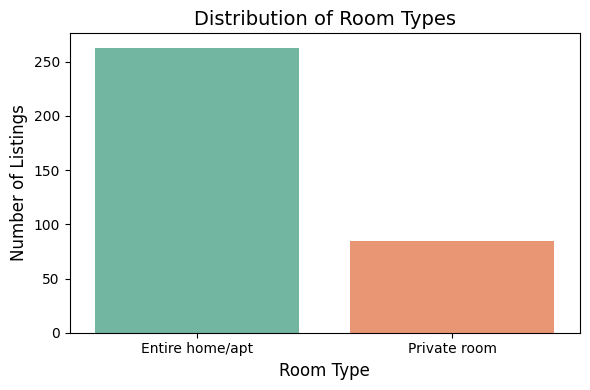

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clean, x='room_type', palette='Set2')
plt.title('Distribution of Room Types', fontsize=14)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.tight_layout()
plt.savefig('room_type_counts.png', dpi=300)
plt.show()


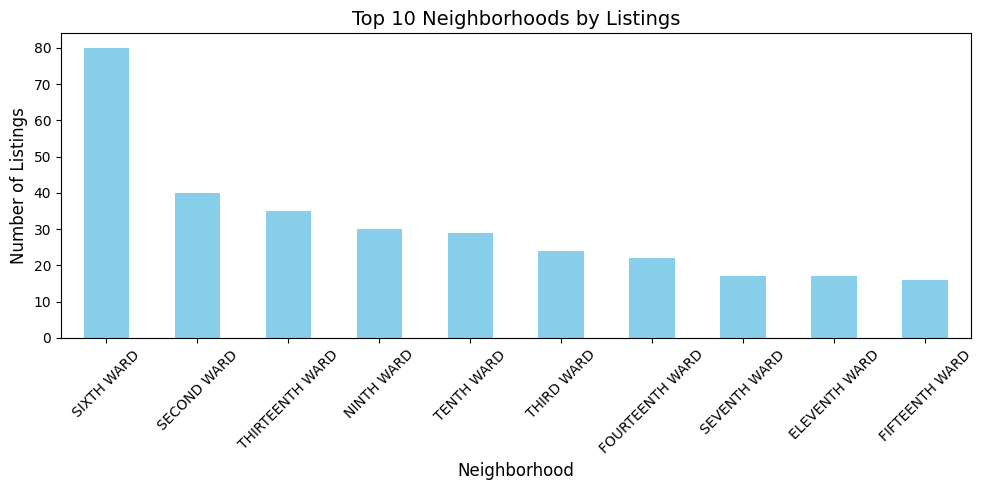

In [19]:
plt.figure(figsize=(10, 5))
top_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighborhoods by Listings', fontsize=14)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_neighborhoods.png', dpi=300)
plt.show()


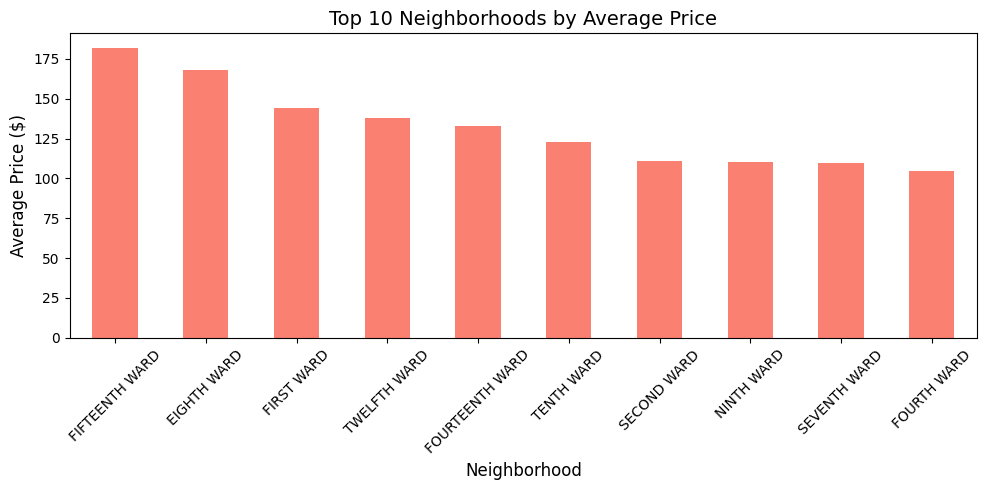

In [20]:
plt.figure(figsize=(10, 5))
price_by_neighborhood.plot(kind='bar', color='salmon')
plt.title('Top 10 Neighborhoods by Average Price', fontsize=14)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('avg_price_by_neighborhood.png', dpi=300)
plt.show()


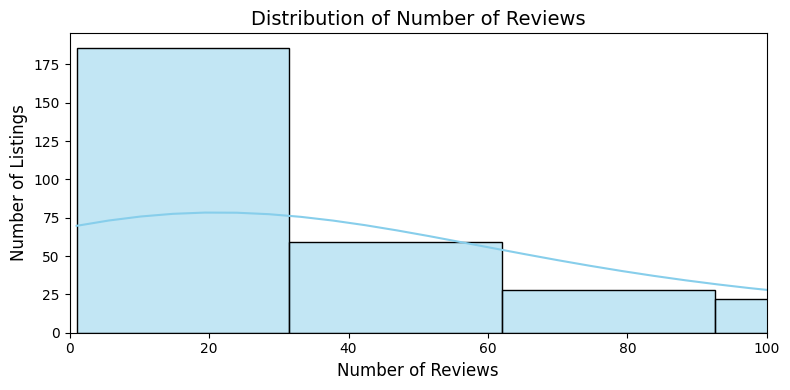

In [21]:
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['number_of_reviews'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Number of Reviews', fontsize=14)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xlim(0, 100)
plt.tight_layout()
plt.savefig('reviews_distribution.png', dpi=300)
plt.show()



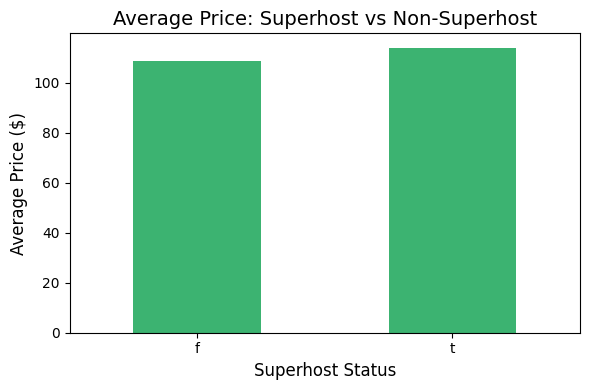

In [22]:
plt.figure(figsize=(6, 4))
avg_price_superhost.plot(kind='bar', color='mediumseagreen')
plt.title('Average Price: Superhost vs Non-Superhost', fontsize=14)
plt.xlabel('Superhost Status', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('superhost_vs_price.png', dpi=300)
plt.show()
